<a href="https://colab.research.google.com/github/ogundan/Jamb-Performance-Analysis/blob/main/Ayomide_Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Of Necessary Libraries

In [ ]:
import pandas as pd
import os

import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Data From Kaggle

In [ ]:
# Download latest version
path = kagglehub.dataset_download("idowuadamo/students-performance-in-2024-jamb")

print("Path to dataset files:", path)

100%|██████████| 74.9k/74.9k [00:00<00:00, 36.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/idowuadamo/students-performance-in-2024-jamb/versions/1


In [ ]:
os.listdir(path)

['jamb_exam_results.csv']

In [ ]:
# read data from path using pandas
df = pd.read_csv(os.path.join(path, 'jamb_exam_results.csv'))

## Exploratory Data Analysis

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
JAMB_Score,5000.0,174.07460,47.616477,100.0,135.00,170.0,209.00,367.0
Study_Hours_Per_Week,5000.0,19.52120,9.634569,0.0,13.00,19.0,26.00,40.0
Attendance_Rate,5000.0,84.23520,9.485688,50.0,78.00,84.0,91.00,100.0
Teacher_Quality,5000.0,2.52140,0.985564,1.0,2.00,2.0,3.00,5.0
Distance_To_School,5000.0,10.00546,4.820221,0.0,6.60,10.0,13.40,20.0
Student_ID,5000.0,2500.50000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,18.44580,2.301504,15.0,16.00,18.0,20.00,22.0
Assignments_Completed,5000.0,1.80460,0.992076,1.0,1.00,1.0,2.00,5.0


In [ ]:
df.isnull().sum()

,0
JAMB_Score,0
Study_Hours_Per_Week,0
Attendance_Rate,0
Teacher_Quality,0
Distance_To_School,0
School_Type,0
School_Location,0
Extra_Tutorials,0
Access_To_Learning_Materials,0
Parent_Involvement,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   JAMB_Score                    5000 non-null   int64  
 1   Study_Hours_Per_Week          5000 non-null   int64  
 2   Attendance_Rate               5000 non-null   int64  
 3   Teacher_Quality               5000 non-null   int64  
 4   Distance_To_School            5000 non-null   float64
 5   School_Type                   5000 non-null   object 
 6   School_Location               5000 non-null   object 
 7   Extra_Tutorials               5000 non-null   object 
 8   Access_To_Learning_Materials  5000 non-null   object 
 9   Parent_Involvement            5000 non-null   object 
 10  IT_Knowledge                  5000 non-null   object 
 11  Student_ID                    5000 non-null   int64  
 12  Age                           5000 non-null   int64  
 13  Gen

# Questions To Ask The Data

## 1. Student With Maximum Score

In [ ]:
df[df['JAMB_Score'] == df['JAMB_Score'].max()]

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
1586,367,35,100,3,15.1,Private,Urban,Yes,Yes,Low,High,1587,18,Female,High,Secondary,4
2874,367,40,84,4,2.0,Public,Urban,Yes,Yes,Medium,Medium,2875,19,Female,Medium,Secondary,5
4190,367,28,89,3,5.0,Public,Rural,No,No,Medium,Medium,4191,17,Female,Medium,Tertiary,1


In [ ]:
df.columns

Index(['JAMB_Score', 'Study_Hours_Per_Week', 'Attendance_Rate',
       'Teacher_Quality', 'Distance_To_School', 'School_Type',
       'School_Location', 'Extra_Tutorials', 'Access_To_Learning_Materials',
       'Parent_Involvement', 'IT_Knowledge', 'Student_ID', 'Age', 'Gender',
       'Socioeconomic_Status', 'Parent_Education_Level',
       'Assignments_Completed'],
      dtype='object')

## 2. Parental Education Level On Student Performance

In [ ]:
df.shape

(5000, 17)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.columns

Index(['JAMB_Score', 'Study_Hours_Per_Week', 'Attendance_Rate',
       'Teacher_Quality', 'Distance_To_School', 'School_Type',
       'School_Location', 'Extra_Tutorials', 'Access_To_Learning_Materials',
       'Parent_Involvement', 'IT_Knowledge', 'Student_ID', 'Age', 'Gender',
       'Socioeconomic_Status', 'Parent_Education_Level',
       'Assignments_Completed'],
      dtype='object')

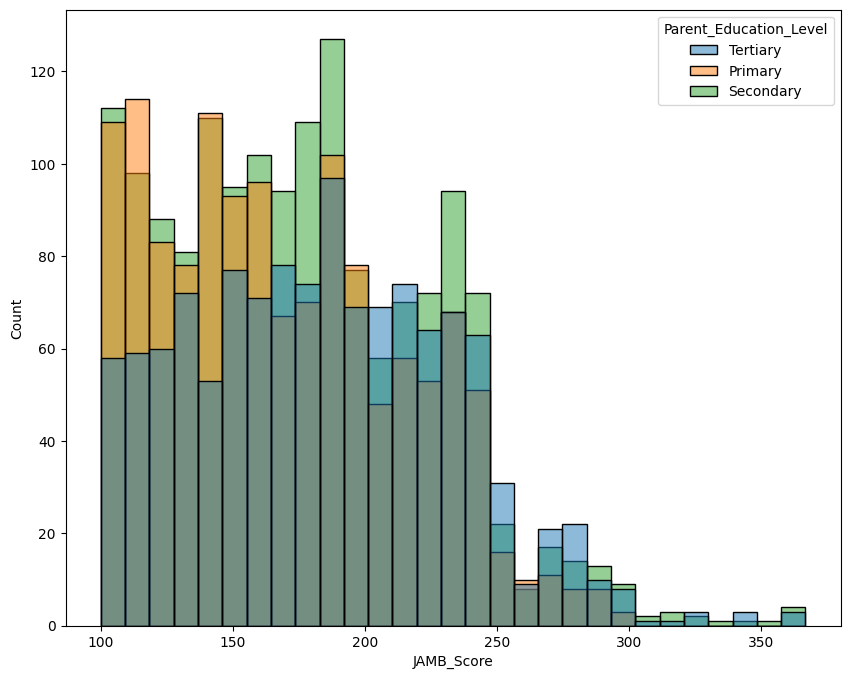

In [ ]:
# parental educational level on jamb score
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10,8))
sns.histplot(data=df, x='JAMB_Score', hue='Parent_Education_Level')
plt.show()

In [ ]:
df['Parent_Education_Level'].unique()

array(['Tertiary', 'Primary', 'Secondary'], dtype=object)

In [ ]:
df.shape

(4109, 17)

<ipython-input-20-567e055f3b51>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_pel.index, y=data_pel.values, palette='viridis') # Use 'viridis' or other palettes


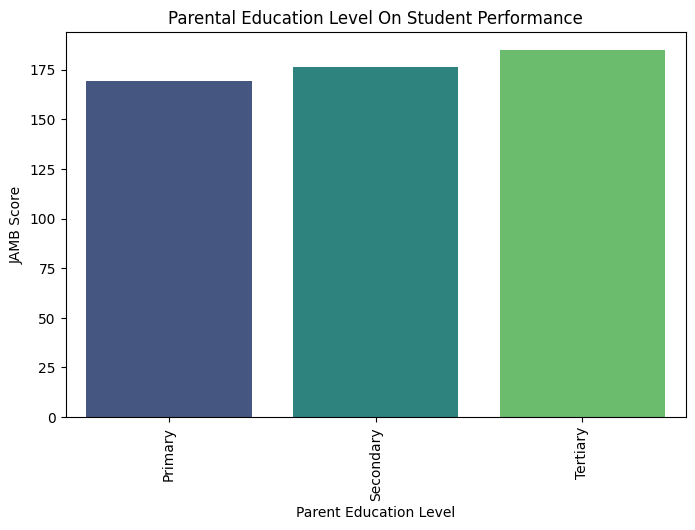

In [ ]:
# group the parental education by jamb score average
data_pel = df.groupby('Parent_Education_Level')['JAMB_Score'].mean()
plt.figure(figsize=(8,5))
sns.barplot(x=data_pel.index, y=data_pel.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Parent Education Level')
plt.ylabel('JAMB Score')
plt.title('Parental Education Level On Student Performance')
plt.show()

In [ ]:
df.columns

Index(['JAMB_Score', 'Study_Hours_Per_Week', 'Attendance_Rate',
       'Teacher_Quality', 'Distance_To_School', 'School_Type',
       'School_Location', 'Extra_Tutorials', 'Access_To_Learning_Materials',
       'Parent_Involvement', 'IT_Knowledge', 'Student_ID', 'Age', 'Gender',
       'Socioeconomic_Status', 'Parent_Education_Level',
       'Assignments_Completed'],
      dtype='object')

In [ ]:
grouped_data = df.groupby('Study_Hours_Per_Week')['JAMB_Score'].mean().reset_index()

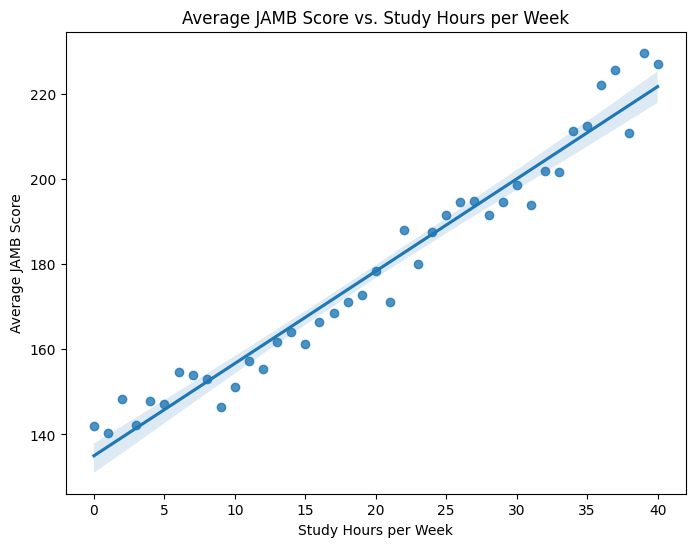

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Study_Hours_Per_Week', y='JAMB_Score', data=grouped_data)  # Use regplot for trend line
plt.title('Average JAMB Score vs. Study Hours per Week')
plt.xlabel('Study Hours per Week')
plt.ylabel('Average JAMB Score')
plt.show()